### Import all the requirements

In [86]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.set_option('display.max_rows', 100)

# Step A: Data Gathering

### StepA.1: Aggregate the sales data from multiple excel sheets

In [87]:
txtfiles = []

# Intention: Iterate over all the excel files in the sales data folder & create a combined dataframe
overall_sales_data_df = None
for make_level_sales_file in glob.glob("./sales-data/*.xlsx"):
    sales_data_dict = {}
    sales_data_df =None
    sheets = load_workbook(make_level_sales_file, read_only=True).sheetnames
    print(make_level_sales_file)
    # Step 1A: Iterate over all the sheets to get year-wise data for the make example: Hyundau - 2022, 2021 etc data
    for sheet in sheets:
        sales_data_dict[sheet] = pd.read_excel(open(make_level_sales_file,'rb'), sheet_name=sheet)
        if sales_data_df is None:
            sales_data_df = sales_data_dict[sheet]
        else:
            sales_data_df = pd.merge(sales_data_df, sales_data_dict[sheet], on=["Maker/Brand", "Group", "Type", "Model","Segment"])
    # Step 1B: Add this make level df to the overall sales df
    if overall_sales_data_df is None:
        overall_sales_data_df = sales_data_df
    else:
        overall_sales_data_df = pd.concat([overall_sales_data_df,sales_data_df])
    

./sales-data/Datsun_dataset.xlsx
./sales-data/Hyundai_dataset.xlsx
./sales-data/Suzuki_dataset.xlsx
./sales-data/Skoda_dataset.xlsx
./sales-data/Toyota_dataset.xlsx
./sales-data/Honda_dataset.xlsx
./sales-data/Mahindra_dataset.xlsx
./sales-data/VW_dataset.xlsx
./sales-data/Tata_dataset.xlsx
./sales-data/Renault_dataset.xlsx


In [88]:
overall_sales_data_df

,Group,Maker/Brand,Type,Segment,Model,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Renault-Nissan Alliance,Datsun,Cars,A,Redi-GO,757,1037,975,333,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Renault-Nissan Alliance,Datsun,Cars,B,Go,65,220,129,208,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Renault-Nissan Alliance,Datsun,UVs/MPVs,MPV,Go+,346,165,11,26,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Hyundai Kia Automotive Group,Hyundai,Cars,A,Grand i10,12387,11970,14120,12420,7509,...,11343.0,-,-,-,-,-,-,-,-,-
1,Hyundai Kia Automotive Group,Hyundai,Cars,B,Xcent,289,112,100,100,0,...,346.0,-,-,-,-,-,-,-,-,-
2,Hyundai Kia Automotive Group,Hyundai,Cars,B,i20,8673,8550,10653,5376,4032,...,5248.0,-,-,-,-,-,-,-,-,-
3,Hyundai Kia Automotive Group,Hyundai,Cars,C,Accent (Verna),4491,4519,4293,3661,2572,...,3789.0,-,-,-,-,-,-,-,-,-
4,Hyundai Kia Automotive Group,Hyundai,UVs/MPVs,SUV-C,Creta (ix25),14200,15602,16655,14938,8291,...,12402.0,-,-,-,-,-,-,-,-,-
5,Hyundai Kia Automotive Group,Hyundai,UVs/MPVs,SUV-C,Tucson (ix35),110,145,140,120,100,...,49.0,-,-,-,-,-,-,-,-,-
0,Suzuki,Suzuki,Cars,A,Alto,18719,18228,18390,18400,3684,...,8022.0,-,-,-,-,-,-,-,-,-


### Step A.2: Popularity Index Calculation Based on the Sales Data

In [89]:
# Step 2.A: Using melt transposed the data to get Monthly level sales at Make-Model-Month level
overall_sales_data_df = overall_sales_data_df.melt(id_vars=["Group", "Maker/Brand","Type","Segment","Model"], 
        var_name="Month", 
        value_name="Sales")

In [90]:
# Step 2.B Remove Not Numeric records from Sales Data
overall_sales_data_df["Sales"] = overall_sales_data_df["Sales"].apply(lambda s: pd.to_numeric(s, errors='coerce'))
overall_sales_data_df = overall_sales_data_df[overall_sales_data_df["Sales"].notna()]

In [91]:
# Step 2.C: Create Monthly Segment Sales
overall_sales_data_df["Monthly_Segment_Sales"] = overall_sales_data_df["Sales"].groupby([overall_sales_data_df["Month"],overall_sales_data_df["Segment"]]).transform('sum')
overall_sales_data_df["Percentage_Contribution"] = (overall_sales_data_df["Sales"] /overall_sales_data_df["Monthly_Segment_Sales"])*100


In [92]:
overall_sales_data_df["Percentage_Contribution"]

0        1.055258
1        0.131329
2        1.321569
3       17.267481
4        0.583909
          ...    
2704    11.767510
2705     8.274293
2706     7.074137
2707    39.588165
2708     5.912672
Name: Percentage_Contribution, Length: 2685, dtype: float64

<AxesSubplot:>

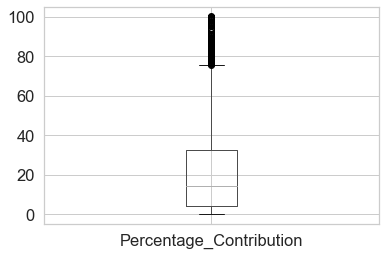

In [93]:
overall_sales_data_df.boxplot(column='Percentage_Contribution', return_type='axes')

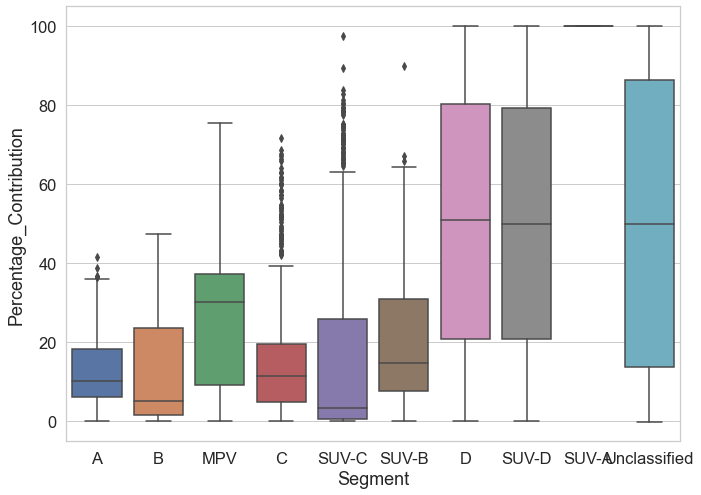

In [94]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

sns.boxplot(x="Segment", y="Percentage_Contribution", data=overall_sales_data_df);

### Step A.3: Get the features & price data

In [95]:
features_df = pd.read_csv('./features-data/cars_ds_final.csv')

In [96]:
# sample data preview
features_df.head(5)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#shape of the featues data
features_df.shape

(1276, 141)

In [102]:
#information of the car features data
features_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Unnamed: 0                                 int64  
 1    Make                                       object 
 2    Model                                      object 
 3    Variant                                    object 
 4    Ex-Showroom_Price                          object 
 5    Displacement                               object 
 6    Cylinders                                  float64
 7    Valves_Per_Cylinder                        float64
 8    Drivetrain                                 object 
 9    Cylinder_Configuration                     object 
 10   Emission_Norm                              object 
 11   Engine_Location                            object 
 12   Fuel_System                                object 
 13   Fuel_Tank_Capacity             

In [103]:
# All the columns of Car Featues
features_df.columns.tolist()

['Unnamed: 0',
 'Make',
 'Model',
 'Variant',
 'Ex-Showroom_Price',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Drivetrain',
 'Cylinder_Configuration',
 'Emission_Norm',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'Doors',
 'City_Mileage',
 'Highway_Mileage',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Track',
 'Rear_Track',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Power_Seats',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seating_Capacity',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 'Start_/_Stop_Button',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Basic_Warranty',
 'Bluetooth',
 'Boot-lid_Opener',

In [104]:
# Description of the Features data
features_df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


# Step B: Data Cleaning

### Step B.1: Cleaning Features + Price Data (At Make, Model and Varient Level)

In [105]:
# Dropping the Unamed columns as it is simply as index

features_df = features_df.drop('Unnamed: 0',axis=1)

In [106]:
# Dropping City_Mileage, Highway_Mileage and ARAI_Certified_Mileage_for_CNG as we are keeping ARAI_Certified_Mileage
features_df = features_df.drop(['City_Mileage','Highway_Mileage','ARAI_Certified_Mileage_for_CNG','Average_Fuel_Consumption'],axis=1)

In [107]:
# Dropping other specs
features_df = features_df.drop(['Tripmeter',"Other_Specs","Other_specs"],axis=1)

In [108]:
# Correcting minor issues in the csv files to get the current datatype
features_df['Ex-Showroom_Price'] = features_df['Ex-Showroom_Price'].str.replace('Rs. ','')
features_df['Ex-Showroom_Price'] = features_df['Ex-Showroom_Price'].str.replace(',','')
features_df['Ex-Showroom_Price'] = features_df['Ex-Showroom_Price'].astype(int)
features_df = features_df[~features_df.ARAI_Certified_Mileage.isnull()]
features_df = features_df[~features_df.Make.isnull()]
features_df = features_df[~features_df.Width.isnull()]
features_df = features_df[~features_df.Cylinders.isnull()]
features_df = features_df[~features_df.Wheelbase.isnull()]
features_df = features_df[~features_df['Fuel_Tank_Capacity'].isnull()]
features_df = features_df[~features_df['Seating_Capacity'].isnull()]
features_df = features_df[~features_df['Torque'].isnull()]
features_df['Height'] = features_df['Height'].str.replace(' mm','').astype(float)
features_df['Length'] = features_df['Length'].str.replace(' mm','').astype(float)
features_df['Width'] = features_df['Width'].str.replace(' mm','').astype(float)
features_df['Wheelbase'] = features_df['Wheelbase'].str.replace(' mm','').astype(float)
features_df['Fuel_Tank_Capacity'] = features_df['Fuel_Tank_Capacity'].str.replace(' litres','').astype(float)
features_df['Displacement'] = features_df['Displacement'].str.replace(' cc','')
features_df.loc[features_df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
features_df.loc[features_df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
features_df['ARAI_Certified_Mileage'] = features_df['ARAI_Certified_Mileage'].str.replace(' km/litre','').astype(float)
features_df.Number_of_Airbags.fillna(0,inplace= True)
features_df['price'] = features_df['Ex-Showroom_Price']
features_df.drop(columns='Ex-Showroom_Price', inplace= True)
features_df.price = features_df.price.astype(int)
HP = features_df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = features_df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
features_df.Torque = TQ
features_df.Power = HP
features_df.Doors = features_df.Doors.astype(int)
features_df.Seating_Capacity = features_df.Seating_Capacity.astype(int)
features_df.Number_of_Airbags = features_df.Number_of_Airbags.astype(int)
features_df.Displacement = features_df.Displacement.astype(int)
features_df.Cylinders = features_df.Cylinders.astype(int)
features_df["Kerb_Weight"] = features_df["Kerb_Weight"].str.replace(' kg','')
features_df["Kerb_Weight"] = features_df["Kerb_Weight"].apply(pd.to_numeric, errors='coerce').fillna(0)
features_df["Ground_Clearance"] = features_df["Ground_Clearance"].str.replace(' mm','')
features_df["Ground_Clearance"] = features_df["Ground_Clearance"].apply(pd.to_numeric, errors='coerce').fillna(0)
features_df["Front_Track"] = features_df["Front_Track"].str.replace(' mm','')
features_df["Front_Track"] = features_df["Front_Track"].apply(pd.to_numeric, errors='coerce').fillna(0)
features_df["Rear_Track"] = features_df["Rear_Track"].str.replace(' mm','')
features_df["Rear_Track"] = features_df["Rear_Track"].apply(pd.to_numeric, errors='coerce').fillna(0)
features_df["Minimum_Turning_Radius"] = features_df["Minimum_Turning_Radius"].str.replace(' meter','')
features_df["Minimum_Turning_Radius"] = features_df["Minimum_Turning_Radius"].apply(pd.to_numeric, errors='coerce').fillna(0)
features_df["Gross_Vehicle_Weight"] = features_df["Gross_Vehicle_Weight"].str.replace(' kg','')
features_df["Gross_Vehicle_Weight"] = features_df["Gross_Vehicle_Weight"].apply(pd.to_numeric, errors='coerce').fillna(0)


/tmp/ipykernel_39003/1642787549.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  features_df['Ex-Showroom_Price'] = features_df['Ex-Showroom_Price'].str.replace('Rs. ','')


In [109]:
# Get info to check columns datatypes
features_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 1275
Data columns (total 133 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Make                                       object 
 1    Model                                      object 
 2    Variant                                    object 
 3    Displacement                               int64  
 4    Cylinders                                  int64  
 5    Valves_Per_Cylinder                        float64
 6    Drivetrain                                 object 
 7    Cylinder_Configuration                     object 
 8    Emission_Norm                              object 
 9    Engine_Location                            object 
 10   Fuel_System                                object 
 11   Fuel_Tank_Capacity                         float64
 12   Fuel_Type                                  object 
 13   Height                          

In [110]:
# Handle all NaN value - BIUFC stands for boolean, signed integer, 
# unsigned integer, floating-point, complex floating-point

features_df = features_df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('No'))

In [111]:
features_df

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,price
0,Tata,Nano Genx,Xt,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,292667
1,Tata,Nano Genx,Xe,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,236447
3,Tata,Nano Genx,Xta,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,334768
4,Tata,Nano Genx,Xm,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,272223
5,Tata,Nano Genx,Xma,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,314815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498,4,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,No,No,No,Yes,0.0,No,No,No,No,1302000
1272,Honda,City,Zx Mt Diesel,1498,4,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,Yes,No,No,Yes,0.0,No,No,No,No,1421000
1273,Honda,City,Zx Cvt Petrol,1497,4,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",...,Yes,No,No,Yes,0.0,No,No,No,No,1431000
1274,Honda,City,V Cvt Petrol,1497,4,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",...,No,No,No,Yes,0.0,No,No,No,No,1201000


In [112]:
# Final info for the Features + Price data
features_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 1275
Data columns (total 133 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Make                                       object 
 1    Model                                      object 
 2    Variant                                    object 
 3    Displacement                               int64  
 4    Cylinders                                  int64  
 5    Valves_Per_Cylinder                        float64
 6    Drivetrain                                 object 
 7    Cylinder_Configuration                     object 
 8    Emission_Norm                              object 
 9    Engine_Location                            object 
 10   Fuel_System                                object 
 11   Fuel_Tank_Capacity                         float64
 12   Fuel_Type                                  object 
 13   Height                          

### Step B.2 Cleaning the Sales Data

In [113]:
## Get the info of the sales data
overall_sales_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 0 to 2708
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Group                    2685 non-null   object        
 1   Maker/Brand              2685 non-null   object        
 2   Type                     2685 non-null   object        
 3   Segment                  2685 non-null   object        
 4   Model                    2685 non-null   object        
 5   Month                    2685 non-null   datetime64[ns]
 6   Sales                    2685 non-null   float64       
 7   Monthly_Segment_Sales    2685 non-null   float64       
 8   Percentage_Contribution  2641 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 209.8+ KB


In [114]:
# Rename column containing slash (/) - We prefeer columns to have underscore
overall_sales_data_df["Make"] = overall_sales_data_df["Maker/Brand"]
overall_sales_data_df.drop(columns='Maker/Brand', inplace= True)

# Step C: Data Preparation

Merge both the sales data and features + price data together

In [115]:
# Inner merge to keep the common data only
complete_data_df = overall_sales_data_df.merge(features_df,how='inner',\
                            left_on=['Make','Model'],\
                            right_on=['Make',"Model"])


In [116]:
# Get the info
complete_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6381 entries, 0 to 6380
Data columns (total 140 columns):
 #    Column                                     Dtype         
---   ------                                     -----         
 0    Group                                      object        
 1    Type_x                                     object        
 2    Segment                                    object        
 3    Model                                      object        
 4    Month                                      datetime64[ns]
 5    Sales                                      float64       
 6    Monthly_Segment_Sales                      float64       
 7    Percentage_Contribution                    float64       
 8    Make                                       object        
 9    Variant                                    object        
 10   Displacement                               int64         
 11   Cylinders                                  int64      

In [117]:
# Get the shape
complete_data_df.shape

(6381, 140)

In [118]:
# Get the Models which are covered after the merge
complete_data_df["Model"].unique()

array(['Go', 'Xcent', 'Kodiaq', 'Camry', 'Fortuner', 'Amaze', 'City',
       'Tiago', 'Tigor', 'Nexon', 'Kwid'], dtype=object)

# Step D: Data Visualization

## Step D.1 : Features Data

In [119]:
# Checking for outliers
plt.figure(figsize=(40,80), dpi=200)
index = 1
for column in features_df.columns.values:
    if features_df[column].dtype.kind in 'biufc':
        plt.subplot(10,3,index)
        index +=1
        sns.boxplot(x = column, data = features_df)
    

In [120]:
# checking for outliers using the Z-score

numeric_columns = []
for column in features_df.columns.values:
    if features_df[column].dtype.kind in 'biufc':
        numeric_columns.append(column)
z = np.abs(stats.zscore(features_df[numeric_columns]))

# Decide the THRESHOLD on the basis of count of the dropping records
THRESHOLD = 4
old_records = features_df.shape
dropping_records = z[(z > THRESHOLD).any(1)].shape

print(f"Dropping {dropping_records[0]} from {old_records[0]} entries")
print(f"Making total entries as {old_records[0]-dropping_records[0]}")

Dropping 64 from 987 entries
Making total entries as 923


In [121]:
# Drop the records
features_df_outliers_removed = features_df[(z<THRESHOLD).all(axis=1)]
features_df_outliers_removed.shape

(923, 133)

In [122]:
features_df_outliers_removed


,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,price
0,Tata,Nano Genx,Xt,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,292667
1,Tata,Nano Genx,Xe,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,236447
3,Tata,Nano Genx,Xta,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,334768
4,Tata,Nano Genx,Xm,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,272223
5,Tata,Nano Genx,Xma,624,2,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,No,No,No,No,0.0,No,No,No,No,314815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1498,4,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,No,No,No,Yes,0.0,No,No,No,No,1302000
1272,Honda,City,Zx Mt Diesel,1498,4,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,Yes,No,No,Yes,0.0,No,No,No,No,1421000
1273,Honda,City,Zx Cvt Petrol,1497,4,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",...,Yes,No,No,Yes,0.0,No,No,No,No,1431000
1274,Honda,City,V Cvt Petrol,1497,4,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",...,No,No,No,Yes,0.0,No,No,No,No,1201000


# Step E: Cluster Creation

## Step E.1: Converting the string data into numeric 

In [123]:
features_df_outliers_removed = pd.read_csv("features_df_outliers_removed.csv")


In [124]:
features_df_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Columns: 137 entries, Make to P3
dtypes: float64(8), int64(18), object(111)
memory usage: 716.2+ KB


In [125]:
X = features_df_outliers_removed.drop(['Make','Model','Variant'],axis =1)  
Y = features_df_outliers_removed[['Make','Model','Variant']]

In [126]:
## Standardize the object categorical data so that it can be used
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
X_copy = X
for column in X_copy.columns.values:
    if not (X_copy[column].dtype.kind in 'biufc'):
        label = le.fit_transform(X[column])
        X.drop(column, axis=1, inplace=True)
        X[column]=label     

## Step E.2 Principal Component Analysis 

In [127]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 134 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Displacement                               int64  
 1    Cylinders                                  int64  
 2    Valves_Per_Cylinder                        int64  
 3    Fuel_Tank_Capacity                         float64
 4    Height                                     int64  
 5    Length                                     int64  
 6    Width                                      int64  
 7    Doors                                      int64  
 8    ARAI_Certified_Mileage                     float64
 9    Kerb_Weight                                int64  
 10   Ground_Clearance                           float64
 11   Front_Track                                int64  
 12   Rear_Track                                 int64  
 13   Power                            

In [128]:
## Shapes of X & Y. Y contains the Make Model Varient which we are keeping separately
X.shape
Y.shape

(669, 3)

In [129]:
X.head(2)

,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,ARAI_Certified_Mileage,Kerb_Weight,...,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,624,2,2,24.0,1652,3164,1750,5,23.6,660,...,0,0,0,2,0,0,0,0,0,0
1,624,2,2,24.0,1652,3164,1750,5,23.6,725,...,0,0,0,2,0,0,0,0,0,0


In [130]:
Y.head(2)

,Make,Model,Variant
0,Tata,Nano Genx,Xt
1,Tata,Nano Genx,Xe


In [131]:
# Standardization of the dataset before performing PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
# Dataframe of Standardized Scaled version of X
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head(5)

,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,ARAI_Certified_Mileage,Kerb_Weight,...,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,-1.477329,-2.234753,-2.172526,-1.689521,0.435672,-2.352248,-0.063561,0.560804,1.029973,-0.509619,...,-0.396786,-0.772437,-0.695248,-0.034993,-0.560662,-0.662352,-0.123185,-0.161473,0.0,0.0
1,-1.477329,-2.234753,-2.172526,-1.689521,0.435672,-2.352248,-0.063561,0.560804,1.029973,-0.410649,...,-0.396786,-0.772437,-0.695248,-0.034993,-0.560662,-0.662352,-0.123185,-0.161473,0.0,0.0
2,-1.477329,-2.234753,-2.172526,-1.689521,0.435672,-2.352248,-0.063561,0.560804,0.631895,-0.410649,...,-0.396786,-0.772437,-0.695248,-0.034993,-0.560662,-0.662352,-0.123185,-0.161473,0.0,0.0
3,-1.477329,-2.234753,-2.172526,-1.689521,0.435672,-2.352248,-0.063561,0.560804,1.029973,-0.410649,...,-0.396786,-0.772437,-0.695248,-0.034993,-0.560662,-0.662352,-0.123185,-0.161473,0.0,0.0
4,-1.477329,-2.234753,-2.172526,-1.689521,0.435672,-2.352248,-0.063561,0.560804,0.631895,-0.433488,...,-0.396786,-0.772437,-0.695248,-0.034993,-0.560662,-0.662352,-0.123185,-0.161473,0.0,0.0


<AxesSubplot:>

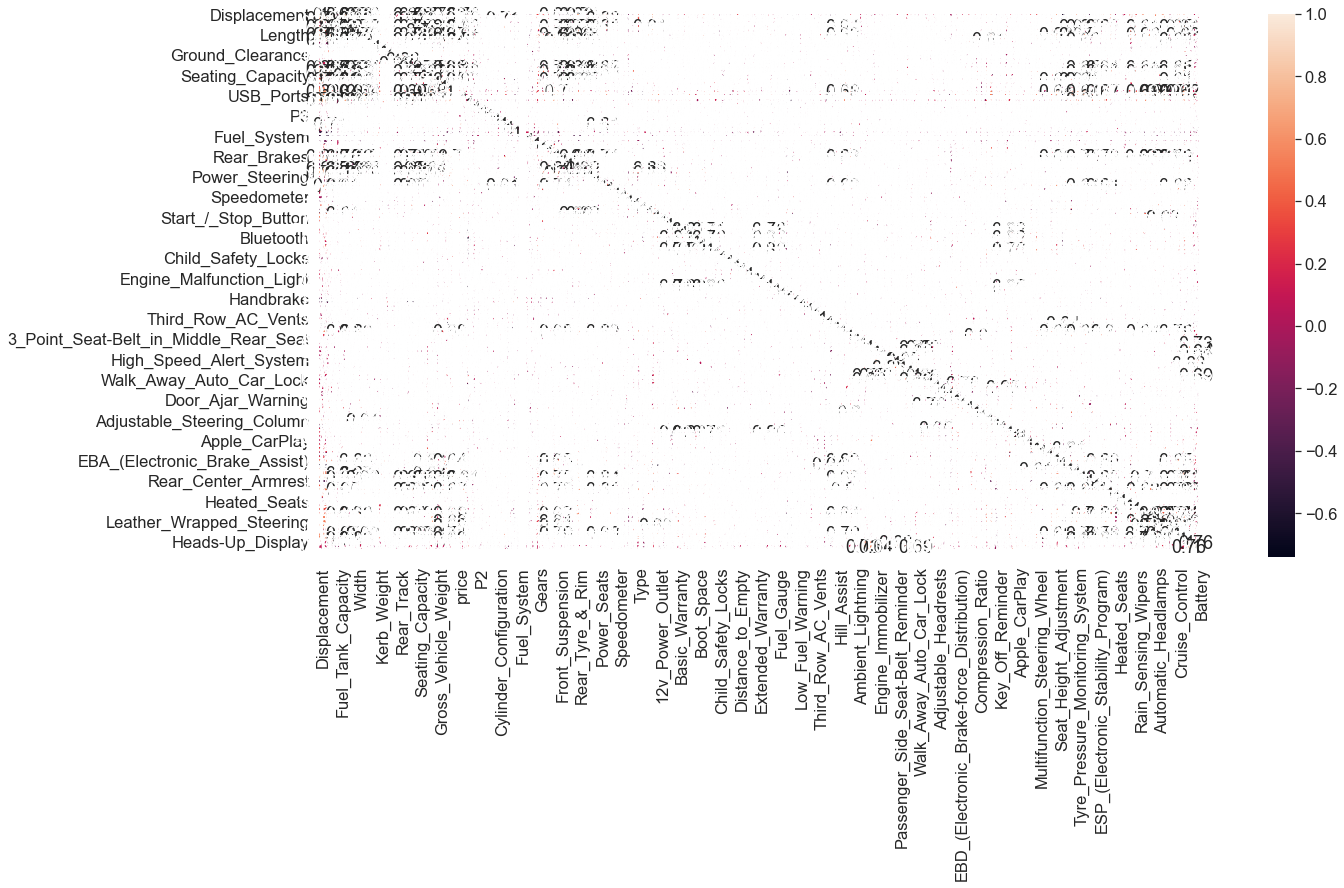

In [133]:
# The correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [134]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)
pca.components_[0]
pca.explained_variance_ratio_

array([2.09614927e-01, 6.67520044e-02, 5.59504355e-02, 3.72346618e-02,
       3.23860245e-02, 2.49044517e-02, 2.41399181e-02, 2.31301570e-02,
       2.21483657e-02, 1.91038170e-02, 1.86883775e-02, 1.75501202e-02,
       1.54149757e-02, 1.52186561e-02, 1.41391655e-02, 1.36714399e-02,
       1.27078284e-02, 1.19365901e-02, 1.16690096e-02, 1.11996659e-02,
       1.08407043e-02, 1.06407094e-02, 9.96968171e-03, 9.46419841e-03,
       9.31784581e-03, 9.00675429e-03, 8.82807372e-03, 8.50908428e-03,
       8.33427649e-03, 8.22579970e-03, 7.77794196e-03, 7.56560020e-03,
       7.42806582e-03, 7.29605197e-03, 6.98614930e-03, 6.74443677e-03,
       6.69383465e-03, 6.41277914e-03, 6.30055308e-03, 6.08776737e-03,
       5.99623827e-03, 5.90728344e-03, 5.47125539e-03, 5.31202434e-03,
       5.28359440e-03, 5.10818565e-03, 4.95471918e-03, 4.67481325e-03,
       4.52545407e-03, 4.40900806e-03, 4.18489617e-03, 4.04749151e-03,
       3.99827317e-03, 3.91589335e-03, 3.73721579e-03, 3.57839251e-03,
      

In [135]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.20961493, 0.27636693, 0.33231737, 0.36955203, 0.40193805,
       0.4268425 , 0.45098242, 0.47411258, 0.49626095, 0.51536476,
       0.53405314, 0.55160326, 0.56701824, 0.58223689, 0.59637606,
       0.6100475 , 0.62275533, 0.63469192, 0.64636093, 0.65756059,
       0.6684013 , 0.679042  , 0.68901169, 0.69847589, 0.70779373,
       0.71680049, 0.72562856, 0.73413764, 0.74247192, 0.75069772,
       0.75847566, 0.76604126, 0.77346933, 0.78076538, 0.78775153,
       0.79449597, 0.8011898 , 0.80760258, 0.81390313, 0.8199909 ,
       0.82598714, 0.83189442, 0.83736568, 0.8426777 , 0.8479613 ,
       0.85306948, 0.8580242 , 0.86269901, 0.86722447, 0.87163348,
       0.87581837, 0.87986586, 0.88386414, 0.88778003, 0.89151725,
       0.89509564, 0.89858761, 0.90201898, 0.90534641, 0.90857483,
       0.91169696, 0.91473967, 0.91774753, 0.92070138, 0.92358327,
       0.9264027 , 0.92907739, 0.9317414 , 0.93432802, 0.93687066,
       0.93934799, 0.94168717, 0.94396944, 0.94618579, 0.94834

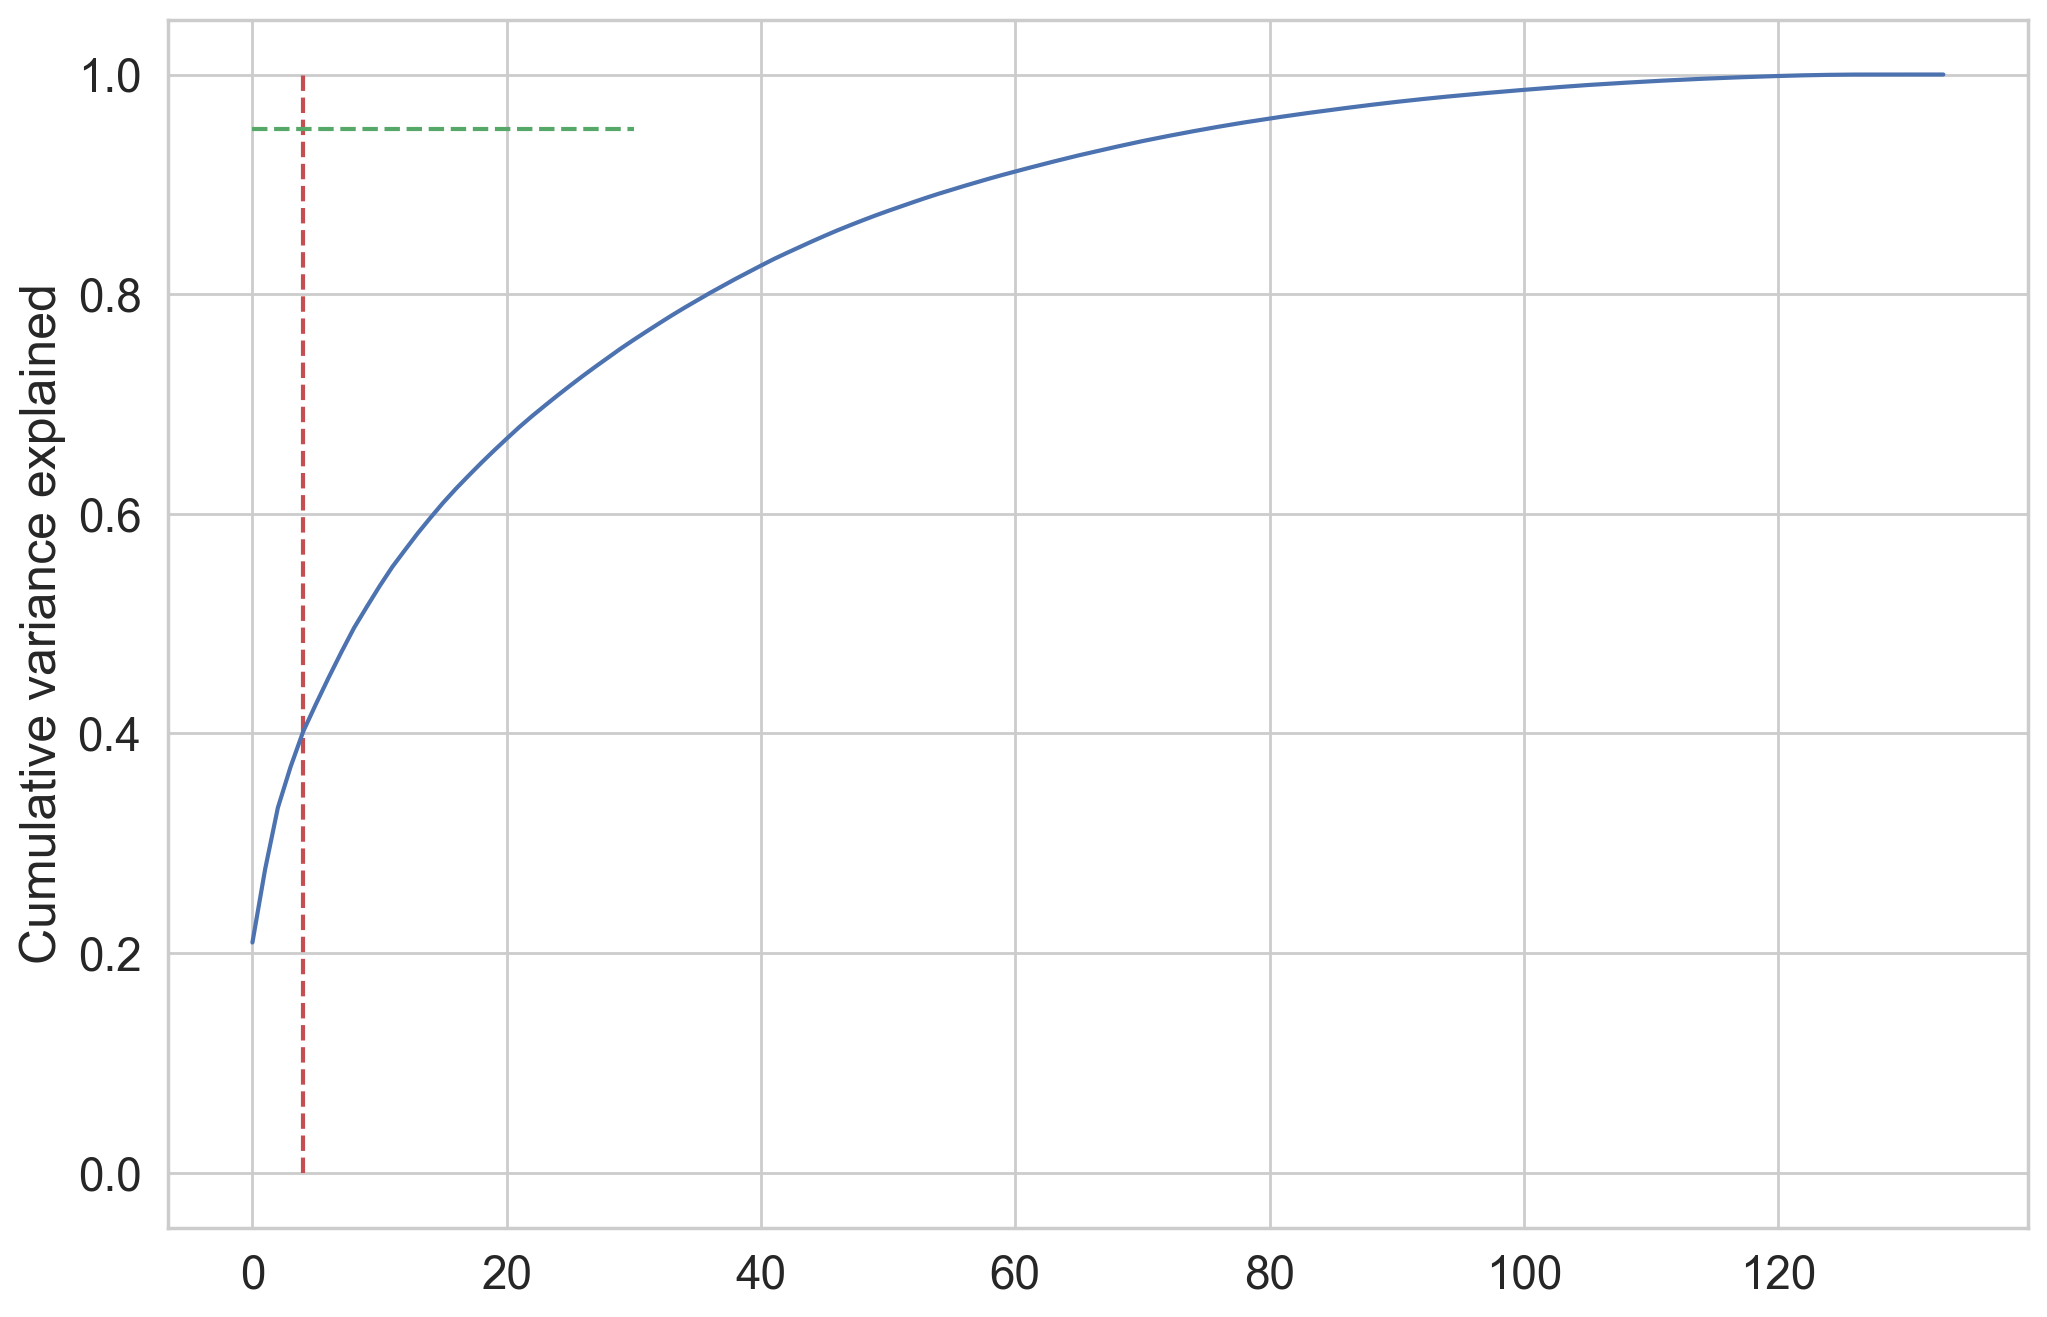

In [136]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [137]:
from sklearn.decomposition import IncrementalPCA

In [138]:
pca_final = IncrementalPCA(n_components=3)

In [139]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [140]:
X_pca_final = pd.DataFrame(X_pca_final) 
X_pca_final.columns = ['P1', 'P2','P3'] 

In [141]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [142]:
corrmat.shape

(3, 3)

<AxesSubplot:>

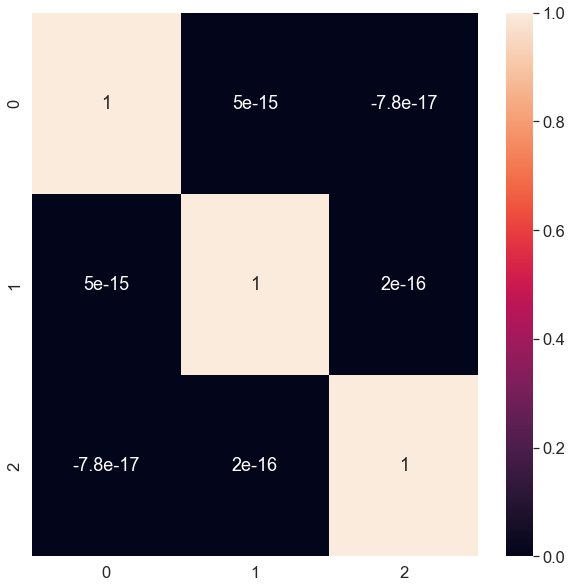

In [143]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [145]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

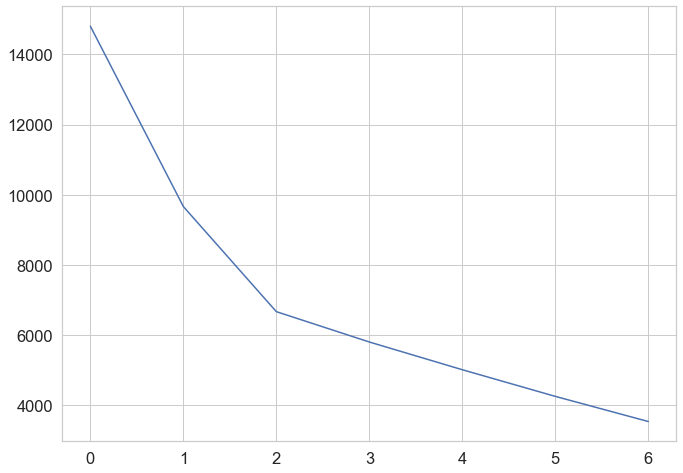

In [146]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [147]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5207108557229975
For n_clusters=3, the silhouette score is 0.4777667260141727
For n_clusters=4, the silhouette score is 0.5141988602782771
For n_clusters=5, the silhouette score is 0.4986285820276106
For n_clusters=6, the silhouette score is 0.41440049350975205
For n_clusters=7, the silhouette score is 0.4842963204993685
For n_clusters=8, the silhouette score is 0.4159712846271668


In [148]:
# final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [149]:
X_pca_final

,P1,P2,P3
0,-8.229736,-1.592533,0.784273
1,-9.829726,-4.554273,1.971621
2,-7.474652,-1.749941,0.946651
3,-9.495204,-3.931647,1.713474
4,-8.400730,-3.849398,1.684392
...,...,...,...
664,-2.752234,2.262884,0.871879
665,-4.527156,-5.205105,0.478865
666,-4.807225,-5.386601,0.741077
667,-3.082821,-1.423668,-1.147266


/home/vidhi/.local/lib/python3.8/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


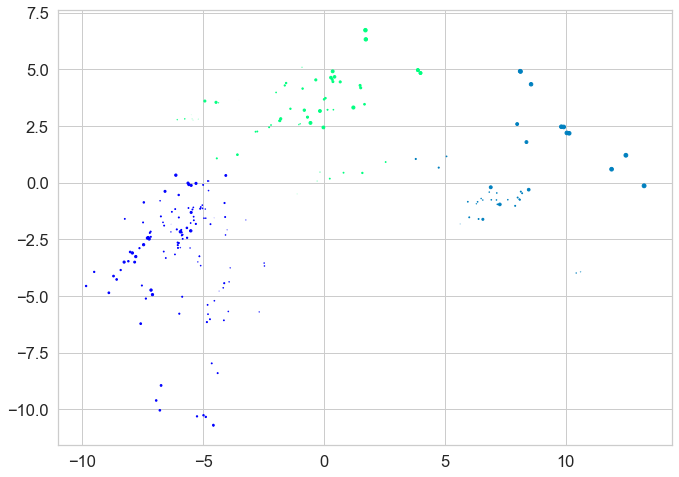

In [150]:
# Visualizing the clustering 
plt.scatter(X_pca_final['P1'], X_pca_final['P2'], X_pca_final['P3'],
           c = KMeans(n_clusters = 3).fit_predict(X_pca_final), cmap =plt.cm.winter) 
plt.show() 

In [151]:
features_df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_
features_df_outliers_removed['P1'] = pd.Series(X_pca_final['P1'].values)
features_df_outliers_removed['P2'] = pd.Series(X_pca_final['P2'].values)
features_df_outliers_removed['P3'] = pd.Series(X_pca_final['P3'].values)

In [152]:
features_df_outliers_removed

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,...,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,price,K-Means_Cluster_ID,P1,P2,P3
0,Tata,Nano Genx,Xt,624,2,2,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,0,No,No,No,No,292667,2,-8.229736,-1.592533,0.784273
1,Tata,Nano Genx,Xe,624,2,2,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,0,No,No,No,No,236447,2,-9.829726,-4.554273,1.971621
2,Tata,Nano Genx,Xta,624,2,2,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,0,No,No,No,No,334768,2,-7.474652,-1.749941,0.946651
3,Tata,Nano Genx,Xm,624,2,2,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,0,No,No,No,No,272223,2,-9.495204,-3.931647,1.713474
4,Tata,Nano Genx,Xma,624,2,2,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,0,No,No,No,No,314815,2,-8.400730,-3.849398,1.684392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Hyundai,Grand I10,1.2 Kappa Vtvt Sportz Dual Tone,1197,4,4,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,0,No,No,No,No,640537,0,-2.752234,2.262884,0.871879
665,Fiat,Linea Classic,1.3 Multijet,1248,4,4,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,0,No,No,No,No,751203,2,-4.527156,-5.205105,0.478865
666,Fiat,Linea Classic,1.4,1368,4,4,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,0,No,No,No,No,646336,2,-4.807225,-5.386601,0.741077
667,Fiat,Linea Classic,Plus 1.3 Multijet,1248,4,4,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",...,0,No,No,No,No,808558,2,-3.082821,-1.423668,-1.147266


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='price'>

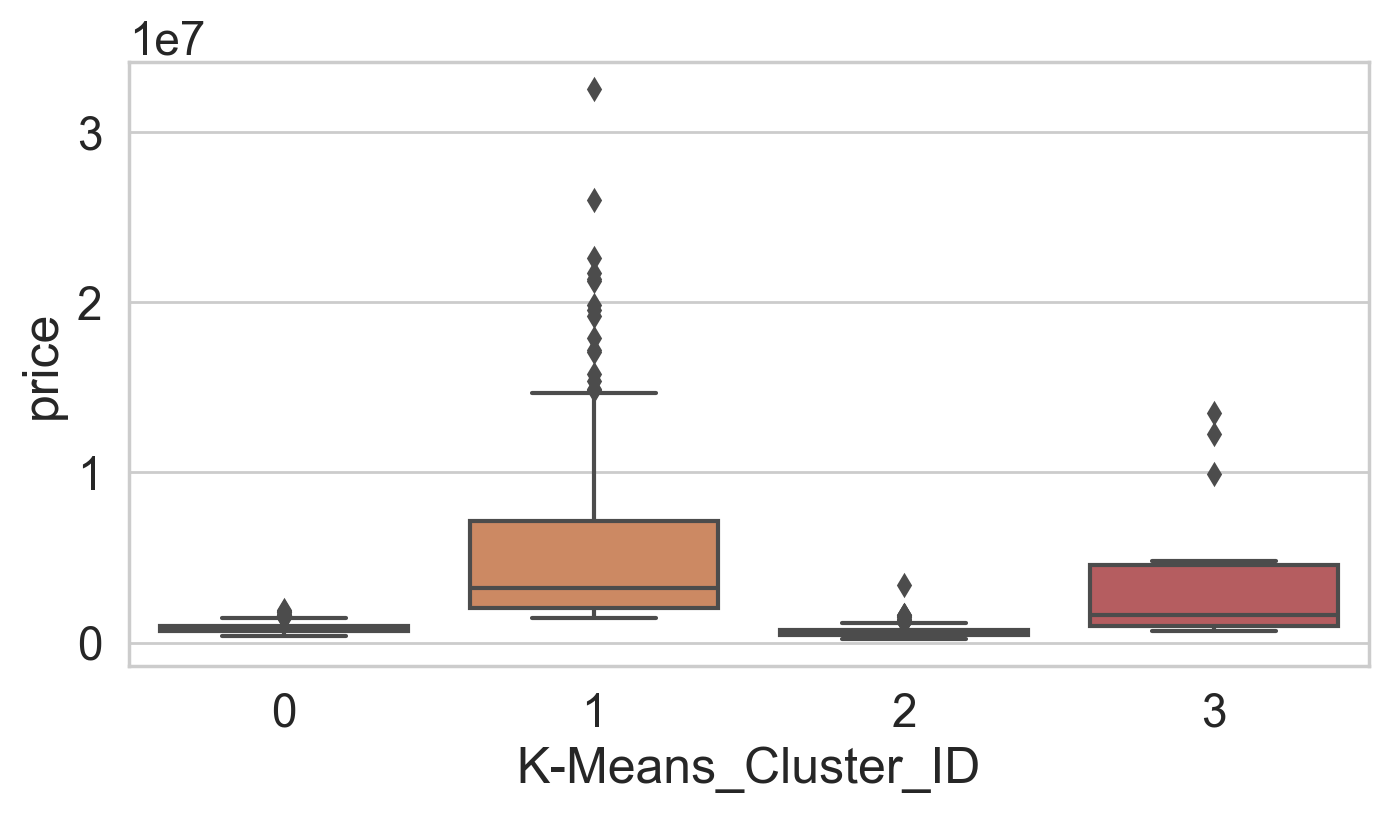

In [153]:
## Price wise cluster comparison
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='price', data=features_df_outliers_removed)

In [154]:
features_df_outliers_removed.columns

Index(['Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Drivetrain', 'Cylinder_Configuration',
       'Emission_Norm', 'Engine_Location',
       ...
       'USB_Ports', 'Heads-Up_Display', 'Welcome_Lights', 'Battery',
       'Electric_Range', 'price', 'K-Means_Cluster_ID', 'P1', 'P2', 'P3'],
      dtype='object', length=137)

In [155]:
#converting csv file to json

df = pd.read_csv (r'features_df_outliers_removed.csv')
df =df.to_json (r'features_df_outliers_removed.json')
df

In [163]:
#3D Scatter plot
import plotly.express as px
fig = px.scatter_3d(features_df_outliers_removed, x='P1', z='P2', y='P3',color='K-Means_Cluster_ID',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='p1,p2 and p3')
fig.show()